# Numerical Solutions of Ordinary Differential Equations (ODEs) with Python

[Download this notebook](https://github.com/8BM050/{{< var repo >}}/blob/main/8bm050/notebooks/01-ode-simulation-with-Python.ipynb){.btn .btn-success .mr-4 }

This notebook accompanies sections 4.3 and 4.5 of the lecture notes. It provides an introduction to the numerical solution of ordinary differential equations (ODEs) using Python. We will focus on the solution of initial value problems (IVPs) for first-order ODEs. For this purpose, we will use the `scipy.integrate.odeint` function. But first, we will briefly look at the fundamentals of numerical solutions of ODEs by discussing the Euler method. As stated in the lecture notes, the Euler method is the simplest numerical method for solving ODEs. It is based on the approximation of the derivative by a finite difference. The Euler method is not always very accurate, but it is easy to implement and understand. We will use the Euler method to solve a simple ODE and later compare the results with the solution obtained by `odeint`.

## Packages
Below the packages we will use in this notebook are imported.

In [86]:
# | code-fold: true

import matplotlib.pyplot as plt
from math import exp
from scipy.integrate import odeint
import numpy as np

## Euler's Method
As mentioned in the lecture notes, Euler's method can be formulated as follows:
For a first-order ODE of the form
$$ \frac{\mathrm{d}y}{\mathrm{d}t} = f(y, t) $$

The Euler method approximates the solution at time $t_{n+1} = t_n + \Delta t$ by
$$ y_{n+1} = y_n + \Delta t \cdot f(y_n, t_n) $$
where $y_n$ is the numerical approximation of the solution at time $t_n$, $\Delta t$ is the step size, and $f(y_n, t_n)$ is the derivative of the solution at time $t_n$.

Let's implement the Euler method to solve the following simple ODE:

$$ \frac{\mathrm{d}y}{\mathrm{d}t} = -y, \quad y(0) = 1 $$

### Implementation of Euler's Method
In Python, we define a function `euler_step` that implements one step of the Euler method for a differential equation of the form $\frac{\mathrm{d}y}{\mathrm{d}t} = f(y, t)$. The function has four arguments:
- `f`: the function $f(y, t)$ that defines the ODE
- `y_n`: the (numerical approximation of the solution) at time $t_n$
- `t_n`: the time $t_n$
- `dt`: the step size $\Delta t$

The function returns the numerical approximation of the solution at time $t_{n+1} = t_n + \Delta t$.

In [87]:
def euler_step(f, y_n, t_n, dt):

    next_y = y_n + dt * f(y_n, t_n)

    return next_y

Now we have to define the function $f(y, t)$ for the ODE $\frac{\mathrm{d}y}{\mathrm{d}t} = -y$. We will call this function `dydt`.

In [88]:
def dydt(y_n, t_n):

    return -y_n

We now define a function `euler_solve` that uses the `euler_step` function to solve the ODE for a given time interval $[t_0, t_{\text{end}}]$ and a given step size $\Delta t$. The function has the following arguments:
- `f`: the function $f(y, t)$ that defines the ODE
- `y0`: the initial value $y(0)$
- `t0`: the initial time $t_0$
- `t_end`: the final time $t_{\text{end}}$
- `dt`: the step size $\Delta t$

The function returns two arrays: one with the time values and one with the corresponding numerical approximations of the solution.

In [89]:
def euler_solve(f, y_0, t_0, t_end, dt):

    # make sure t_end is higher than t_0
    if t_end <= t_0:
        raise ValueError(f"Argument t_end must be larger than t_0. Currently, t_end = {t_end}, which is not larger than t_0 = {t_0}.")
    
    # make sure dt is larger than 0
    if dt <= 0:
        raise ValueError(f"Argument dt must be larger than zero. Currently, dt = {dt} <= 0")

    # now we can start solving
    solution = [y_0]
    time_steps = [t_0]

    # we start at time t_0 + dt, and take steps of size dt, until we hit t_end
    t_n = t_0+dt

    while t_n <= t_end:
        
        # take the last step
        y_n = solution[-1]

        # compute the next value
        next_y = euler_step(f, y_n, t_n, dt)

        # add the next value to the solution 
        solution.append(next_y)
        time_steps.append(t_n)

        # increase the time value
        t_n += dt

    return time_steps, solution

Now, let's use the `euler_solve` function to solve the ODE $\frac{\mathrm{d}y}{\mathrm{d}t} = -y$ with the initial condition $y(0) = 1$ for the time interval $[0, 5]$ and a step size of $\Delta t = 0.1$.

In [90]:
y_0 = 1
t_0 = 0
t_end = 5
dt = 0.1

time_steps, numerical_solution = euler_solve(dydt, y_0, t_0, t_end, dt)

As this is a simple ODE, we can also solve it analytically. The analytical solution of the ODE $\frac{\mathrm{d}y}{\mathrm{d}t} = -y$ with the initial condition $y(0) = 1$ is given by $y(t) = e^{-t}$. Comparing the numerical solution with the analytical solution will allow us to assess the accuracy of the Euler method. We will plot the numerical and analytical solutions to visualize the results.

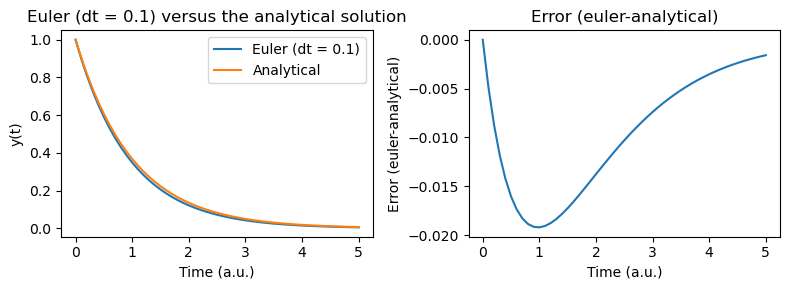

In [91]:
# | fig-cap: Comparison of Euler's method with the analytical solution of the differential equation
# | code-fold: true 
# | lightbox: true 

def analytical_solution(time_steps):
    solution = []
    for t in time_steps:
        solution.append(exp(-t))
    return solution

fig, axs = plt.subplots(1, 2, figsize=(8,3))

# first plot both solutions
axs[0].plot(time_steps, numerical_solution, label="Euler (dt = 0.1)")
axs[0].plot(time_steps, analytical_solution(time_steps), label = "Analytical")
axs[0].set_title("Euler (dt = 0.1) versus the analytical solution")
axs[0].legend()
axs[0].set_xlabel("Time (a.u.)")
axs[0].set_ylabel("y(t)")
# get the difference
error = [numerical - analytical for numerical, analytical in zip(numerical_solution, analytical_solution(time_steps))]

axs[1].set_title("Error (euler-analytical)")
axs[1].plot(time_steps, error)
axs[1].set_xlabel("Time (a.u.)")
axs[1].set_ylabel("Error (euler-analytical)")


plt.tight_layout()

From this figure we can see that in general, the Euler method with this time step reflects the analytical solution quite well, but the difference is visible.

### Exercise 1)

Reduce the time step $\Delta t$ to 0.01 and observe the difference between the numerical and analytical solutions. What do you observe? What happens if you further reduce the time step to 0.001?

In [92]:
# Your code here!

## Using `odeint` to Solve the ODE
Now, let's use the `odeint` function from the `scipy.integrate` module to solve the same ODE and compare the results with the Euler method. The function `odeint` works very similarly to how we have defined the `euler_solve` function. The `odeint` function requires the following arguments:
- `f`: the function $f(y, t)$ that defines the ODE
- `y0`: the initial value $y(0)$
- `t`: an array of time values at which the solution should be computed

The `odeint` function returns an array with the numerical approximations of the solution at the time values specified in the input array.

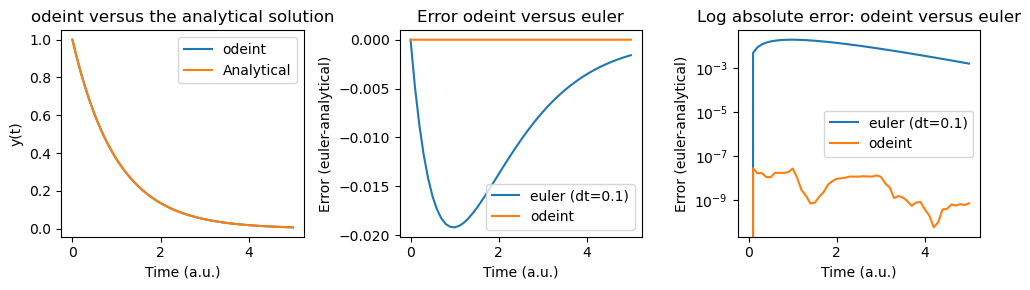

In [93]:
# | fig-cap: Comparison of Euler's method with the default method of `odeint`. 
# | code-fold: true
# | lightbox: true 

odeint_solution = odeint(dydt, 1, time_steps)

fig, axs = plt.subplots(1, 3, figsize=(10,3))

# first plot both solutions
axs[0].plot(time_steps, odeint_solution, label="odeint")
axs[0].plot(time_steps, analytical_solution(time_steps), label = "Analytical")
axs[0].set_title("odeint versus the analytical solution")
axs[0].legend()
axs[0].set_xlabel("Time (a.u.)")
axs[0].set_ylabel("y(t)")
# get the difference
error_odeint = [numerical - analytical for numerical, analytical in zip(odeint_solution, analytical_solution(time_steps))]

axs[1].set_title("Error odeint versus euler")
axs[1].plot(time_steps, error, label="euler (dt=0.1)")
axs[1].plot(time_steps, error_odeint, label="odeint")
axs[1].set_xlabel("Time (a.u.)")
axs[1].set_ylabel("Error (euler-analytical)")
axs[1].legend()

axs[2].set_title("Log absolute error: odeint versus euler")
axs[2].plot(time_steps, [abs(e) for e in error], label="euler (dt=0.1)")
axs[2].plot(time_steps, [abs(e) for e in error_odeint], label="odeint")
axs[2].set_yscale('log')
axs[2].set_xlabel("Time (a.u.)")
axs[2].set_ylabel("Error (euler-analytical)")
axs[2].legend()

plt.tight_layout()

We can see that the `odeint` function provides a more accurate solution than the Euler method. The Euler method is a simple method that is easy to implement and understand, but it is not always very accurate. The `odeint` function uses more sophisticated algorithms to solve ODEs and is generally more accurate. For this reason, it is recommended to use `odeint` for solving ODEs in practice. However, the Euler method is a good starting point to understand the basics of numerical solutions of ODEs. 

### Exercise 2)
Now that you know how to solve ODEs using the `odeint` function, solve the following ODE using `odeint`:

$$ \frac{\mathrm{d}y}{\mathrm{d}t} = y \cdot (1 - y/100), \quad y(0) = 1 $$

In [94]:
# Your code here!

## Solving Systems of ODEs
The `odeint` function can also be used to solve systems of ODEs. In many models, we encounter systems of multiple ODEs, which describe the dynamics of different variables. Let's consider the following system of two ODEs:

$$ \frac{\mathrm{d}y_1}{\mathrm{d}t} = -y_1 + y_2, \quad \frac{\mathrm{d}y_2}{\mathrm{d}t} = y_1 - y_2, \quad y_1(0) = 1, \quad y_2(0) = 0 $$

We can solve this system of ODEs using the `odeint` function. However, instead of defining a function that describes a single ODE, we need to define a function that describes the system of ODEs. This function should return an array with the derivatives of all variables at a given time. We will call this function `dydt_system`.

In [95]:
def dydt_system(y_n, t_n):

    dydt1 = -y_n[0] + y_n[1]
    dydt2 = y_n[0] - y_n[1]

    return [dydt1, dydt2]

Also, instead of providing a single initial value, we need to provide an array with the initial values for all variables. We will call this array `y0_system`. The rest of the procedure is the same as before.

In [96]:
y0_system = [1, 0]

# we can use numpy to easily define a range of values
time_steps = np.linspace(0, 5, 1000)

solution = odeint(dydt_system, y0_system, time_steps)

Instead of a single array with the numerical approximations of the solution, the `odeint` function now returns a two-dimensional array with the numerical approximations of all variables at the time values specified in the input array. We can plot the numerical solutions of both variables to visualize the results.

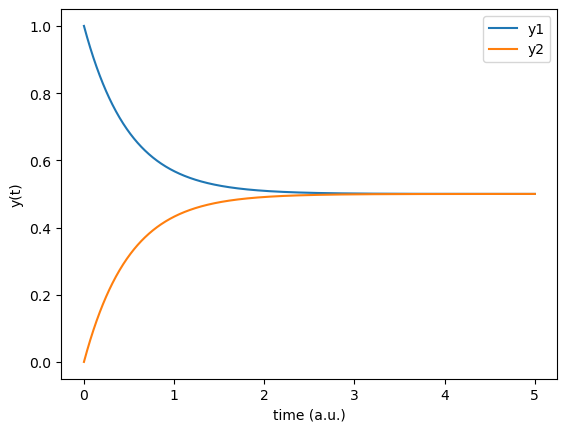

In [97]:
# | fig-cap: Solving a system of ODEs with `odeint`
# | code-fold: true
# | lightbox: true 

plt.plot(time_steps, solution[:,0], label="y1")
plt.plot(time_steps, solution[:,1], label="y2")
plt.legend()
plt.xlabel("time (a.u.)")
plt.ylabel("y(t)")
plt.show()

### Exercise 3)

Solve the following system of ODEs using the `odeint` function:

$$
\begin{align}
\dot{S} &= \frac{-b I S}{n} \\
\dot{I} &= \frac{b I S}{n} - c I \\
\dot{R} &= c I \\
\end{align}
$$

Use the following parameter values: $b = 0.1$, $c = 0.05$, $n = 1000$, and the initial conditions $S(0) = 999$, $I(0) = 1$, $R(0) = 0$. Plot the numerical solutions of $S(t)$, $I(t)$, and $R(t)$.


In [98]:
# Your code here!

## Parameterized ODEs
In many models, the ODEs depend on parameters that can be varied. For example, in the model above, the parameters $b$ and $c$ can have different values. We can study how the solutions of the ODEs change with different parameter values by solving the ODEs for different parameter values. However, it is hard to have to change the parameter values manually and solve the ODEs for each parameter value, or to have a separate function for each combination of parameter values.

Instead, we can define a function that describes the ODEs and takes the parameters as arguments. We will call this function `dydt_system_param`. Observe the following ODE system:

$$
\begin{align}
\dot{S} &= -K_g \cdot S \\
\dot{SI} &= K_g \cdot S - K_a \cdot SI \\
\dot{PV} &= K_a \cdot SI - K_b \cdot PV - \frac{K_l \cdot PV}{K_m + PV} \\
\dot{C} &= \frac{K_b \cdot PV}{V_d} + K_{pc} \cdot P - (K_{cp} + K_e) \cdot C \\
\dot{P} &= K_{cp} \cdot C - K_{pc} \cdot P \\
\end{align}
$$

In here, we have a system of 5 ODEs. We can define a function that describes the system of ODEs and takes the parameters as arguments. We will call this function `dydt_system_param`. The function should return an array with the derivatives of all variables at a given time. The function should take the following arguments:
- `y`: an array with the values of all variables at a given time
- `t`: the time
- `kg`: the parameter $K_g$
- `ka`: the parameter $K_a$
- `kl`: the parameter $K_l$
- `kb`: the parameter $K_b$
- `ke`: the parameter $K_e$
- `kcp`: the parameter $K_{cp}$
- `kpc`: the parameter $K_{pc}$
- `vd`: the parameter $V_d$
- `km`: the parameter $K_m$


In [99]:
def dydt_system_param(y, t, kg, ka, kl, kb, ke, kcp, kpc, vd, km):

    stomach, small_intestine, portal, central, peripheral = y

    dS = -kg * stomach
    dSI = kg * stomach - ka * small_intestine
    dPV = ka * small_intestine - kb*portal - kl * portal / (km + portal)
    dC = (kb*portal)/vd + kpc*peripheral - (kcp + ke) * central
    dP = kcp * central - kpc * peripheral

    return [dS, dSI, dPV, dC, dP]

We can also simulate this system of ODEs for different parameter values using the `args` argument of the `odeint` function. The `args` argument allows us to pass additional arguments to the function that describes the ODEs. We can pass the parameter values as a tuple to the `args` argument. The `odeint` function will then pass these parameter values to the function that describes the ODEs. We can use this feature to simulate the system of ODEs for different parameter values:

In [100]:
# select some parameter values
kg = 0.6
ka = 2.9
kl = 42.5
kb = 4.5
ke = 3.2
kcp = 1.5
kpc = 1.9
vd = 18.
km = 1.7

y_0 = [500.0, 0.0, 0.0, 0.0, 0.0]
time_steps = np.linspace(0, 12, 1000)

solution = odeint(dydt_system_param, y_0, time_steps, args=(kg,ka,kl,kb,ke,kcp,kpc,vd,km))

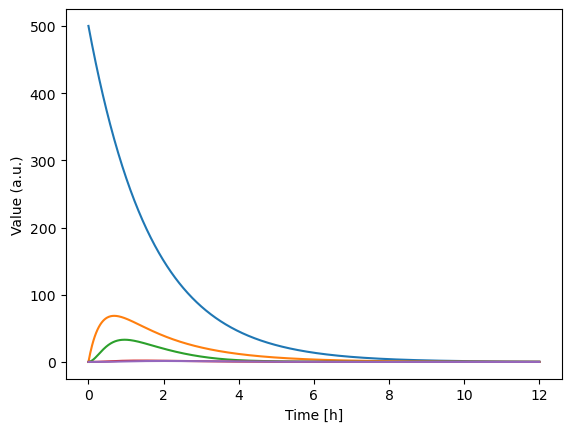

In [101]:
# | fig-cap: Solving a parameterized ODE with `odeint`.
# | code-fold: true
# | lightbox: true 

for i in range(0,5):
    plt.plot(time_steps, solution[:,i])
plt.xlabel("Time [h]")
plt.ylabel("Value (a.u.)")
plt.show()

### Exercise 4)

Take the system from exercise 3, and implement it so you can use the `args` option from the `odeint` function. Simulate the model for different values of `b` and plot the results. What do you observe?

In [102]:
# Your code here!